<a href="https://colab.research.google.com/github/HiteshAI/CartoonGan-tensorflow/blob/master/real_world_images_using_cartoongan_and_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CartoonGAN-TensorFlow2
Cartoonize your images using CartoonGAN, powered by TensorFlow 2.0. 

- [Blog post](https://leemeng.tw/generate-anime-using-cartoongan-and-tensorflow2-en.html)
- [Blog post (Traditional Chinese)](https://leemeng.tw/generate-anime-using-cartoongan-and-tensorflow2.html)
- [Github repo](https://github.com/mnicnc404/CartoonGan-tensorflow)

<img src="https://github.com/mnicnc404/CartoonGan-tensorflow/blob/master/images/cover.gif?raw=true" height="300px">

## Clone github  repo
This repo contain the Python script that we will use to generate cartoon-style images.

In [1]:
import os
repo = "CartoonGan-tensorflow"
!git clone https://github.com/HiteshAI/CartoonGan-tensorflow.git
os.chdir(os.path.join(repo))

Cloning into 'CartoonGan-tensorflow'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 1586 (delta 74), reused 90 (delta 36), pack-reused 1442
Receiving objects: 100% (1586/1586), 346.48 MiB | 30.75 MiB/s, done.
Resolving deltas: 100% (679/679), done.
Checking out files: 100% (426/426), done.


In [2]:
!ls | grep cartoonize.py

cartoonize.py


## Install packages
We will need TensorFlow 2.0 and [keras-contrib](https://github.com/keras-team/keras-contrib) packages.

In [0]:
from IPython.display import clear_output, display, Image

In [0]:
!pip install tensorflow-gpu==2.0.0-alpha0
!git clone https://www.github.com/keras-team/keras-contrib.git \
    && cd keras-contrib \
    && python convert_to_tf_keras.py \
    && USE_TF_KERAS=1 python setup.py install
clear_output()

In [5]:
import tensorflow as tf
tf.__version__

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

'2.0.0-alpha0'

Download the image from the web and save it for transformation. You don't need to know all the detail here now.

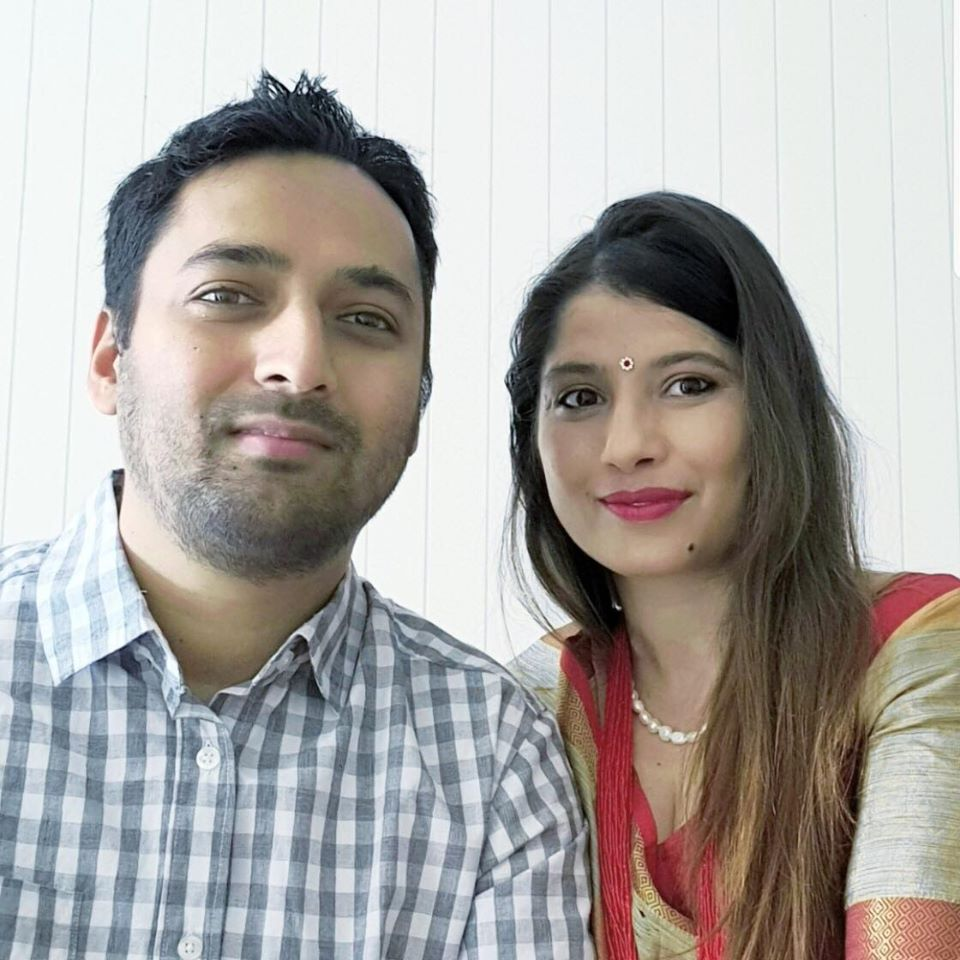

In [19]:
input_image_dir = "input_images"
output_image_dir = input_image_dir.replace("input_", "output_")
image_string_concat = 'pranaya.jpg'

import time
img_filename = image_string_concat
name, ext = '.'.join(img_filename.split(".")[:-1]), img_filename.split(".")[-1]
new_name = '_'.join((name, str(int(time.time()))))
new_img_filename = image_string_concat
image_path = os.path.join(input_image_dir, new_img_filename)
    
# if ".gif" in new_img_filename:
png_path = new_img_filename 
!cp {image_path} {png_path}

display(Image(png_path))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

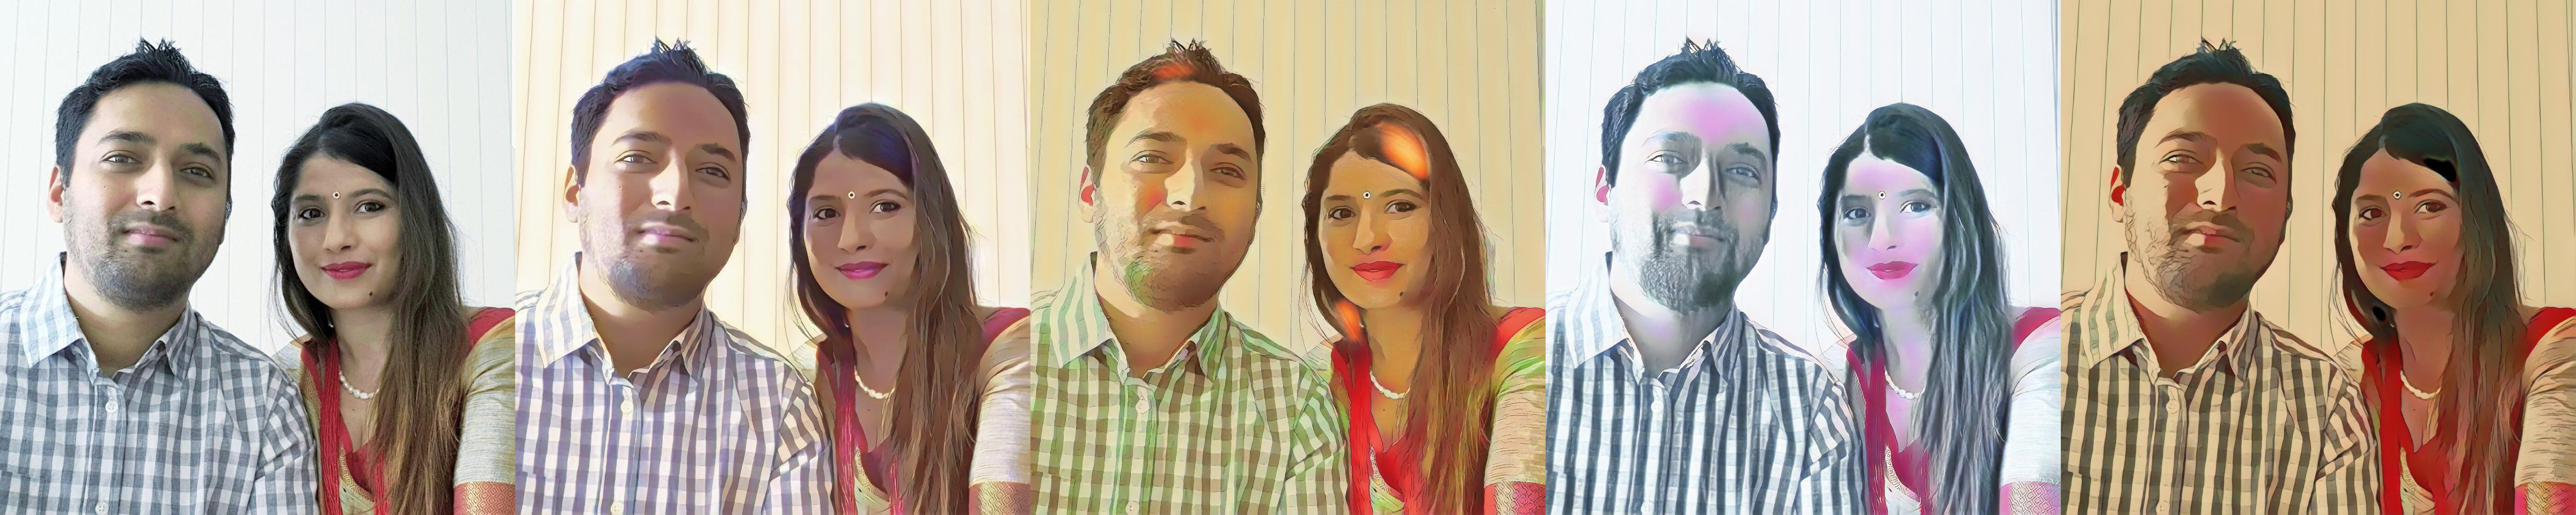

In [20]:

!python cartoonize.py \
    --batch_size 10 \
    --all_styles \
    --comparison_view horizontal \
    --keep_original_size

if img_filename:
    if ".gif" in img_filename:
        generated_gif = os.path.join(output_image_dir, "comparison", new_img_filename)
        result_path = generated_gif + '.png'
        !cp {generated_gif} {result_path}
    else:
        result_path = os.path.join(output_image_dir, "comparison", new_img_filename)
display(Image(result_path))



## Download the result


In [0]:
from google.colab import files
styles = ["shinkai", "hayao", "hosoda", "paprika"]
for styles in styles:
  output_image_path = os.path.join(output_image_dir, styles, new_img_filename)
  files.download(output_image_path)